<h3> Задание 3.
Моделирование движения планет солнечной системы.

**Часть 1. Тестирование работы разных численных методов** 

Необходимо реализовать решение задачи гравитационного притяжения N тел следующими способами:  
1. с помощью odeint / solve_ivp,
2. методом Верле, 
3. методом Верле, распараллелив вычисления с помощью multiprocessing,
4. методом Верле, реализованным на Cython с OpenMP,
5. методом Верле, реализованным на OpenCL(или CUDA).


Рассмотрим систему небесных тел, состоящую из N объектов. Обозначим $m_j, r_j, v_j, \footnotesize {j=\overline{1,N}}$ - масса, радиус-вектор и скорость $j$-го тела соответственно. Сила гравитационного взаимодействия между телами описывается следующей системой ОДУ:  
$\begin{equation}
    \begin{cases}
        \large{\frac{dr_i}{dt}} = \normalsize{v_i},\\
        \large{\frac{dv_i}{dt}} = \small{\sum_{j \ne i}^N G \cdot m_j \cdot} \large{\frac{r_j - r_i}{|r_j - r_i|^3}}
    \end{cases}
\end{equation}$

В качестве небесных тел возьмем 9 планет Солнечной системы, Солнце - начало координат.  

Характеристики планет Солнечной системы:  
 
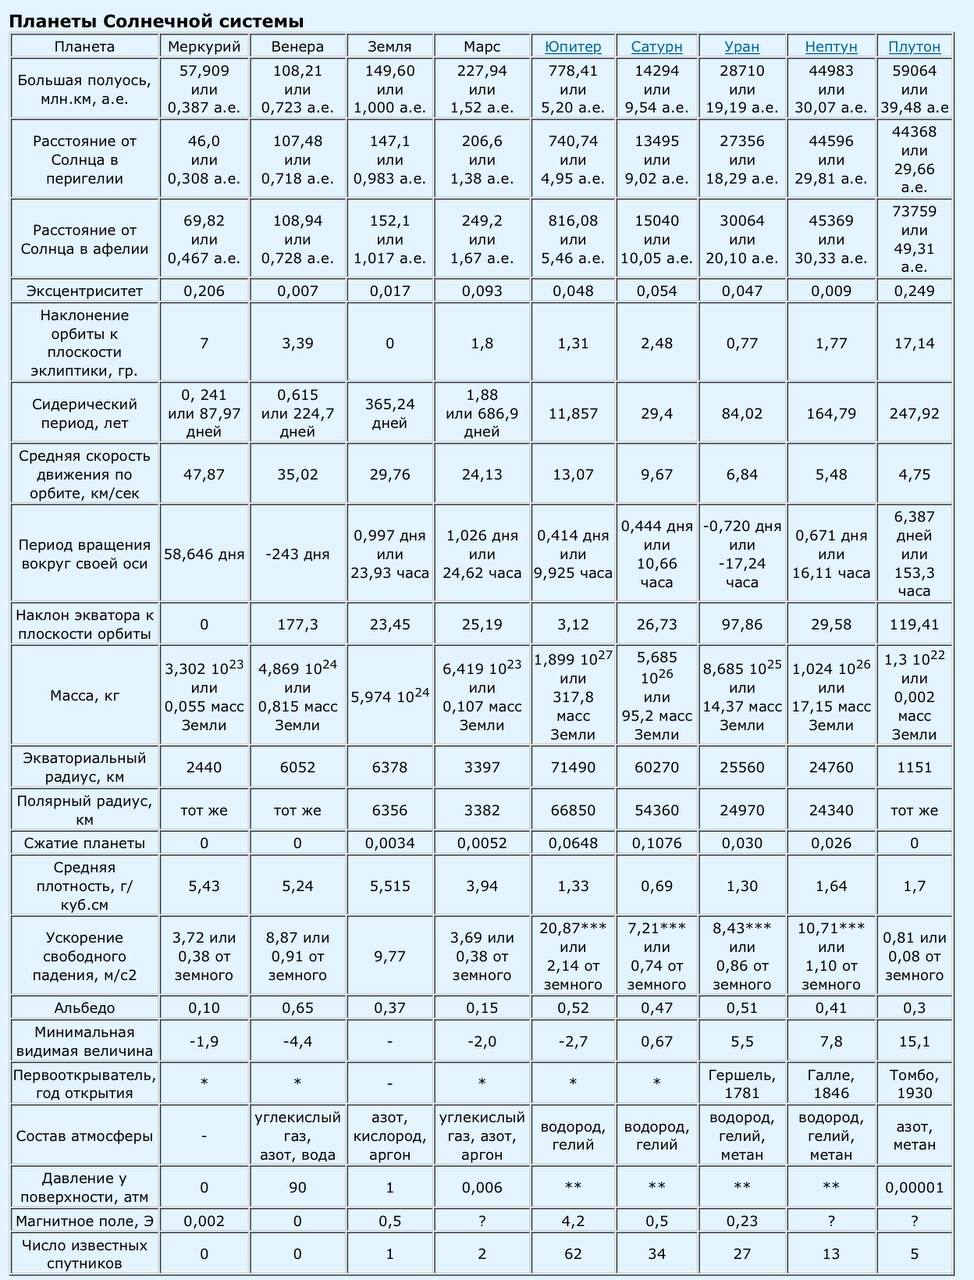

Решение разными способами

1. Решение с помощью odeint

В качестве стартового значения возьмем "парад планет" - все планеты выстроятся по $ox$, остальные координаты положим нулевыми. Стартовую скорость зададим по $oy$ значениями орбитальных скоростей планет.

In [27]:
import numpy as np
from numpy import ndarray

#Plots
from plots.plot_2d import plot_xy

# Solver1
from solvers.solver1 import solver1
import constants

In [40]:
# Инициализация начальных значений, масс
mass = np.array([constants.M_SUN, constants.M_MERCURY, constants.M_VENUS, constants.M_EARTH,
                constants.M_MARS, constants.M_JUPITER, constants.M_SATURN, constants.M_URANUS,
                constants.M_NEPTUNE])
#[rrr vvv     rrr vvv    ... rrr vvv]
rv_start = []

#Sun
rv_start.append(np.array([0.0, 0.0, 0.0, 0.0, 0.0, 0.0]))
#Mercury
rv_start.append(np.array([constants.R_MERCURY, 0.0, 0.0, 0.0, constants.V_MERCURY, 0.0]))
#Venus
rv_start.append(np.array([constants.R_VENUS, 0.0, 0.0, 0.0, constants.V_VENUS, 0.0]))
#Earth
rv_start.append(np.array([constants.R_EARTH, 0.0, 0.0, 0.0, constants.V_EARTH, 0.0]))
#Mars
rv_start.append(np.array([constants.R_MARS, 0.0, 0.0, 0.0, constants.V_MARS, 0.0]))
#Jupiter
rv_start.append(np.array([constants.R_JUPITER, 0.0, 0.0, 0.0, constants.V_JUPITER, 0.0]))
#Saturn
rv_start.append(np.array([constants.R_SATURN, 0.0, 0.0, 0.0, constants.V_SATURN, 0.0]))
#Uranus
rv_start.append(np.array([constants.R_URANUS, 0.0, 0.0, 0.0, constants.V_URANUS, 0.0]))
#Neptune
rv_start.append(np.array([constants.R_NEPTUNE, 0.0, 0.0, 0.0, constants.V_NEPTUNE, 0.0]))

rv_start = np.array(rv_start).flatten()

#Решение первым методом
# полгода = 15768000 сек
time_grid = np.arange(0, 252374400, 86400)# 8 лет, шаг  - 1 день
solve1 = solver1(mass, rv_start, time_grid)


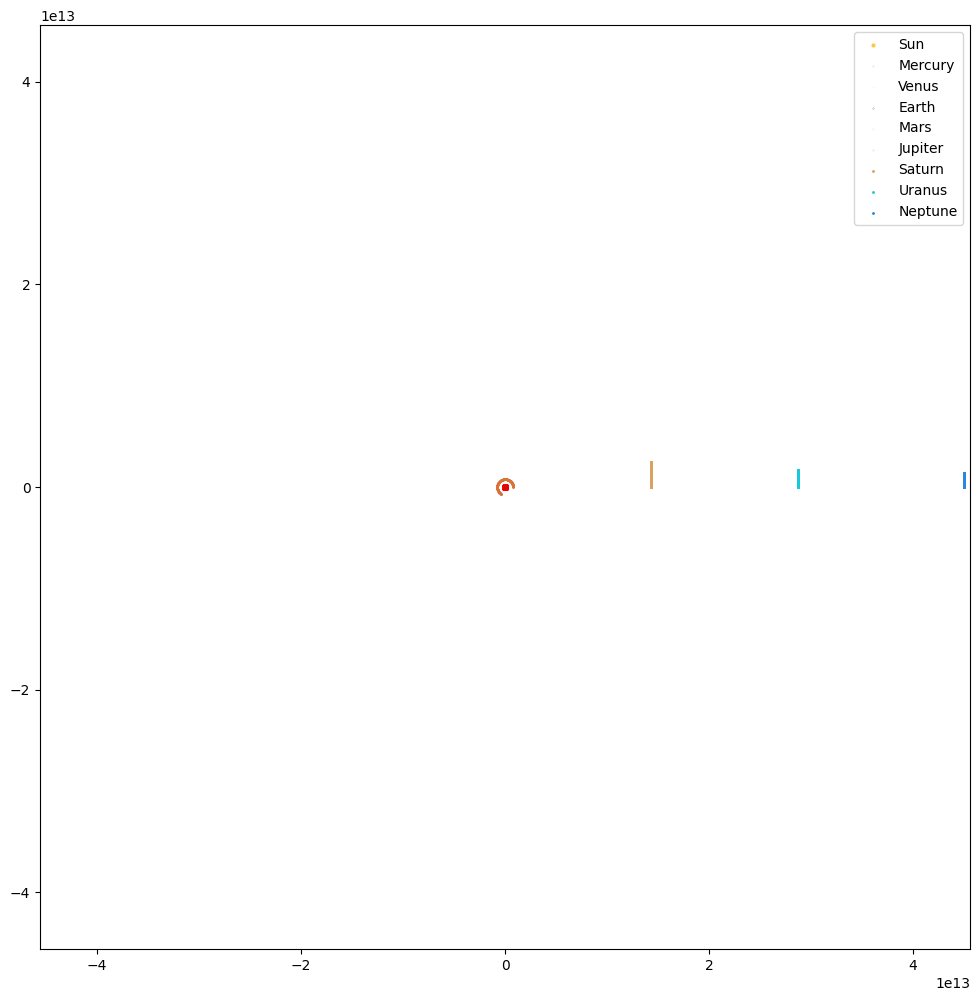

In [41]:
plot_xy(solve1, 456e+11, constants.options)